In [1]:
from sqlalchemy import create_engine
from config import db_password
import pandas as pd
import matplotlib.pyplot as plt
from path import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
db_location = 'probowl.cq2v3ncckm8b.us-east-2.rds.amazonaws.com'

In [3]:
db_string = f"postgresql://postgres:{db_password}@{db_location}/postgres"

In [4]:
engine = create_engine(db_string)

In [5]:
TE_2019_df = pd.read_sql_table('te_2019', engine)

In [6]:
TE_2019_df.head()

,player,tm,age,pos,g,gs,cmp,pass_att,pass_yds,pass_td,...,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
0,Andrew Beck,DEN,23,TE,16,6,1,1,6,0,...,0,0,0,0,0,0,0,0,0,False
1,Jonnu Smith,TEN,24,TE,16,14,0,0,0,0,...,0,4,78,0,44,35,439,3,0,False
2,Derek Carrier,OAK,29,TE,16,4,0,0,0,0,...,0,1,27,0,19,13,108,1,0,False
3,George Kittle,SFO,26,TE,14,14,0,0,0,0,...,0,5,22,0,107,85,1053,5,1,True
4,Dawson Knox,BUF,23,TE,15,11,0,0,0,0,...,0,1,9,0,50,28,388,2,0,False


In [7]:
TE_2019_df = TE_2019_df.drop(columns=["pos","tm"])
TE_2019_df.head()

,player,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
0,Andrew Beck,23,16,6,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,False
1,Jonnu Smith,24,16,14,0,0,0,0,0,0,0,4,78,0,44,35,439,3,0,False
2,Derek Carrier,29,16,4,0,0,0,0,0,0,0,1,27,0,19,13,108,1,0,False
3,George Kittle,26,14,14,0,0,0,0,0,0,0,5,22,0,107,85,1053,5,1,True
4,Dawson Knox,23,15,11,0,0,0,0,0,0,0,1,9,0,50,28,388,2,0,False


In [8]:
TE_2019_df = TE_2019_df.set_index("player")

TE_2019_df

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
player,,,,,,,,,,,,,,,,,,,
Andrew Beck,23,16,6,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,False
Jonnu Smith,24,16,14,0,0,0,0,0,0,0,4,78,0,44,35,439,3,0,False
Derek Carrier,29,16,4,0,0,0,0,0,0,0,1,27,0,19,13,108,1,0,False
George Kittle,26,14,14,0,0,0,0,0,0,0,5,22,0,107,85,1053,5,1,True
Dawson Knox,23,15,11,0,0,0,0,0,0,0,1,9,0,50,28,388,2,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tyrone Swoopes,25,5,2,0,0,0,0,0,0,0,0,0,0,1,1,5,0,0,False
Darrell Daniels,25,11,0,0,0,0,0,0,0,0,0,0,0,3,1,4,0,0,False
Zach Gentry,23,4,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0,False


In [9]:
X_train = TE_2019_df.drop(columns="pro_bowl")

In [10]:
X_train

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb
player,,,,,,,,,,,,,,,,,,
Andrew Beck,23,16,6,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0
Jonnu Smith,24,16,14,0,0,0,0,0,0,0,4,78,0,44,35,439,3,0
Derek Carrier,29,16,4,0,0,0,0,0,0,0,1,27,0,19,13,108,1,0
George Kittle,26,14,14,0,0,0,0,0,0,0,5,22,0,107,85,1053,5,1
Dawson Knox,23,15,11,0,0,0,0,0,0,0,1,9,0,50,28,388,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tyrone Swoopes,25,5,2,0,0,0,0,0,0,0,0,0,0,1,1,5,0,0
Darrell Daniels,25,11,0,0,0,0,0,0,0,0,0,0,0,3,1,4,0,0
Zach Gentry,23,4,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0


In [11]:
y_train = TE_2019_df["pro_bowl"]
y_train

player
Andrew Beck        False
Jonnu Smith        False
Derek Carrier      False
George Kittle       True
Dawson Knox        False
                   ...  
Tyrone Swoopes     False
Darrell Daniels    False
Zach Gentry        False
Xavier Grimble     False
Eric Tomlinson     False
Name: pro_bowl, Length: 119, dtype: bool

In [12]:
TE_2020_df = pd.read_sql_table('te_2020', engine)
TE_2020_df.head()

,player,tm,age,pos,g,gs,cmp,pass_att,pass_yds,pass_td,...,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
0,Logan Thomas,WAS,29,TE,16,15,1,1,28,0,...,0,3,5,0,110,72,670,6,0,False
1,Travis Kelce,KAN,31,TE,15,15,1,2,4,0,...,0,0,0,0,145,105,1416,11,1,True
2,Evan Engram,NYG,26,TE,16,14,0,0,0,0,...,0,6,26,1,109,63,654,1,1,False
3,Tommy Stevens,CAR,24,TE,1,0,0,0,0,0,...,0,4,24,0,0,0,0,0,0,False
4,John Lovett,GNB,24,TE,8,0,0,0,0,0,...,0,3,6,0,0,0,0,0,0,False


In [13]:
TE_2020_df = TE_2020_df.drop(columns=["pos","tm"])
TE_2020_df.head()

,player,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
0,Logan Thomas,29,16,15,1,1,28,0,0,0,0,3,5,0,110,72,670,6,0,False
1,Travis Kelce,31,15,15,1,2,4,0,0,0,0,0,0,0,145,105,1416,11,1,True
2,Evan Engram,26,16,14,0,0,0,0,0,0,0,6,26,1,109,63,654,1,1,False
3,Tommy Stevens,24,1,0,0,0,0,0,0,0,0,4,24,0,0,0,0,0,0,False
4,John Lovett,24,8,0,0,0,0,0,0,0,0,3,6,0,0,0,0,0,0,False


In [14]:
TE_2020_df = TE_2020_df.set_index("player")
TE_2020_df.head()

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb,pro_bowl
player,,,,,,,,,,,,,,,,,,,
Logan Thomas,29,16,15,1,1,28,0,0,0,0,3,5,0,110,72,670,6,0,False
Travis Kelce,31,15,15,1,2,4,0,0,0,0,0,0,0,145,105,1416,11,1,True
Evan Engram,26,16,14,0,0,0,0,0,0,0,6,26,1,109,63,654,1,1,False
Tommy Stevens,24,1,0,0,0,0,0,0,0,0,4,24,0,0,0,0,0,0,False
John Lovett,24,8,0,0,0,0,0,0,0,0,3,6,0,0,0,0,0,0,False


In [15]:
X_test = TE_2020_df.drop(columns="pro_bowl")
X_test.head()

,age,g,gs,cmp,pass_att,pass_yds,pass_td,int,fqc,gwd,rush_att,rush_yds,rush_td,tgt,rec,rec_yds,rec_td,fmb
player,,,,,,,,,,,,,,,,,,
Logan Thomas,29,16,15,1,1,28,0,0,0,0,3,5,0,110,72,670,6,0
Travis Kelce,31,15,15,1,2,4,0,0,0,0,0,0,0,145,105,1416,11,1
Evan Engram,26,16,14,0,0,0,0,0,0,0,6,26,1,109,63,654,1,1
Tommy Stevens,24,1,0,0,0,0,0,0,0,0,4,24,0,0,0,0,0,0
John Lovett,24,8,0,0,0,0,0,0,0,0,3,6,0,0,0,0,0,0


In [16]:
y_test = TE_2020_df["pro_bowl"]
y_test.head()

player
Logan Thomas     False
Travis Kelce      True
Evan Engram      False
Tommy Stevens    False
John Lovett      False
Name: pro_bowl, dtype: bool

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 18)
(116, 18)
(119,)
(116,)


In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [19]:
classifier.fit(X_train, y_train)

C:\Users\soren\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=200, random_state=1)

In [20]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,True,False
1,True,True
2,False,False
3,False,False
4,False,False
5,False,False
6,False,True
7,True,False
8,False,False
9,False,False


In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8620689655172413


In [22]:
# Create a random forest classifier.
rf_model_TE = RandomForestClassifier(n_estimators=128, random_state=78) 

In [23]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Fitting the model
rf_model_TE = rf_model_TE.fit(X_train_scaled, y_train)

In [25]:
# Making predictions using the testing data.
predictions = rf_model_TE.predict(X_test_scaled)
predictions

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [26]:
# Calculating the confusion matrix.
cm1 = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm1_df = pd.DataFrame(
    cm1, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm1_df

,Predicted 0,Predicted 1
Actual 0,106,3
Actual 1,6,1


In [27]:
# Calculating the accuracy score.
acc_score1 = accuracy_score(y_test, predictions)
acc_score1

0.9224137931034483

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm1_df)
print(f"Accuracy Score : {acc_score1}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,106,3
Actual 1,6,1


Accuracy Score : 0.9224137931034483
Classification Report
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       109
        True       0.25      0.14      0.18         7

    accuracy                           0.92       116
   macro avg       0.60      0.56      0.57       116
weighted avg       0.90      0.92      0.91       116



In [29]:
# Calculate feature importance in the Random Forest model.
importances_TE = rf_model_TE.feature_importances_
importances_TE

array([4.62383989e-02, 2.08362482e-02, 4.34106381e-02, 3.07642353e-07,
       0.00000000e+00, 1.30208470e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.03172744e-02, 2.08287855e-02,
       1.39799375e-02, 2.01122480e-01, 1.84356485e-01, 2.26634848e-01,
       1.81830432e-01, 3.04311439e-02])

In [31]:
# We can sort the features by their importance.
sorted(zip(rf_model_TE.feature_importances_, X_test.columns), reverse=True)


[(0.22663484805052966, 'rec_yds'),
 (0.20112248008220115, 'tgt'),
 (0.1843564850951006, 'rec'),
 (0.18183043186073172, 'rec_td'),
 (0.04623839889815297, 'age'),
 (0.04341063806629461, 'gs'),
 (0.030431143898700764, 'fmb'),
 (0.030317274377939706, 'rush_att'),
 (0.02083624820779788, 'g'),
 (0.02082878546161496, 'rush_yds'),
 (0.013979937511584354, 'rush_td'),
 (1.3020846998617731e-05, 'pass_yds'),
 (3.076423530987153e-07, 'cmp'),
 (0.0, 'pass_td'),
 (0.0, 'pass_att'),
 (0.0, 'int'),
 (0.0, 'gwd'),
 (0.0, 'fqc')]

In [32]:
import time
import numpy as np

start_time = time.time()
importances = rf_model_TE.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_TE.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.011 seconds


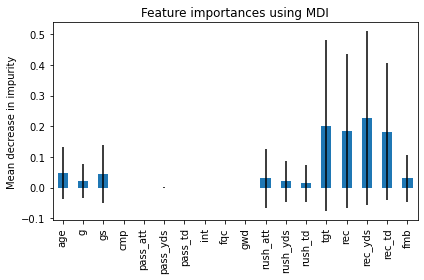

In [33]:
forest_importances_TE = pd.Series(importances_TE, index= X_test.columns)

fig, ax = plt.subplots()

forest_importances_TE.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [34]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(rf_model_TE, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index= X_test.columns)

Elapsed time to compute the importances: 2.194 seconds


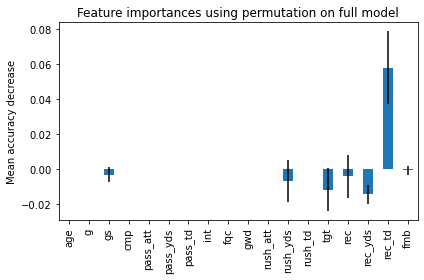

In [35]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()